In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cars.csv')

In [3]:
data.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


# Basic details of Dataset

In [4]:
data.shape

(261, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    int64  
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    int64  
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 14.3 KB


In [6]:
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame          mpg   cylinders   c<...>n\n[261 rows x 7 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


In [7]:
data.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.750958,106.360153,3022.134100,15.547893,1976.819923
std,7.823570,1.733310,108.869697,40.499959,857.036976,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3693.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


# handling missing values

In [8]:
data.isna().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
dtype: int64

In [9]:
 data.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year'],
      dtype='object')

# Outlier detection

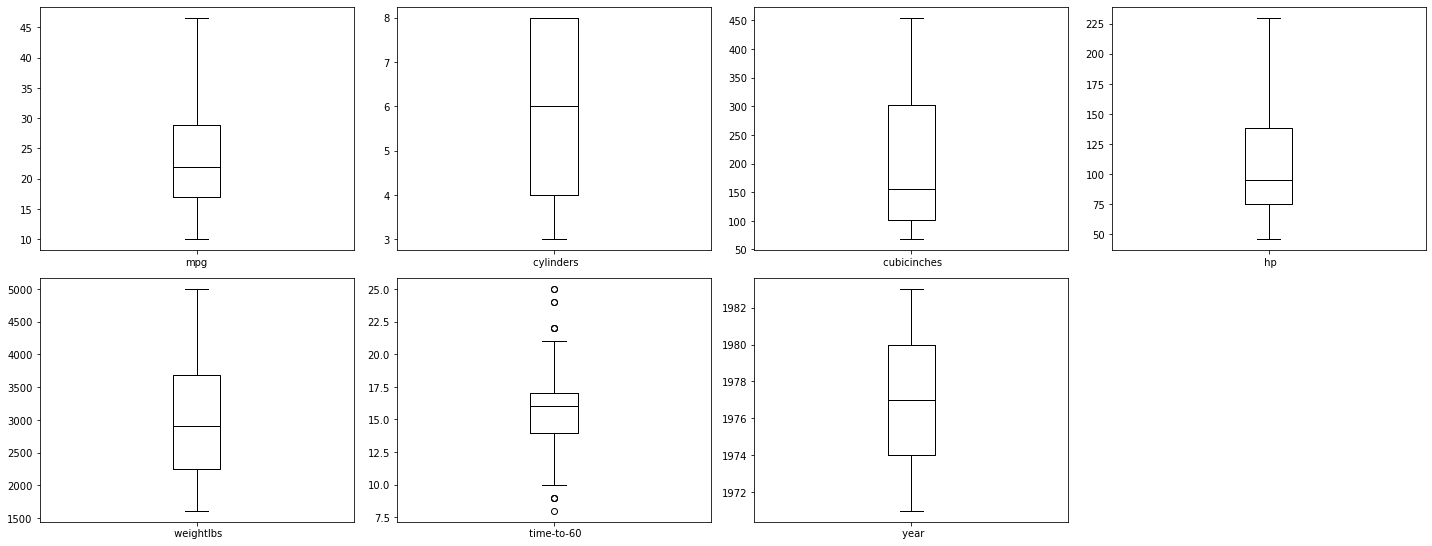

In [10]:
data.plot( kind = 'box',figsize=(20,15),subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.tight_layout()
plt.show()

In [11]:
Q1 = np.percentile(data[' time-to-60'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data[' time-to-60'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data[' time-to-60'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR

In [12]:
print(low_lim)
print(up_lim)

9.5
21.5


In [13]:
ind1 = data[' time-to-60']<low_lim
data.loc[ind1].index

Int64Index([7, 52, 205, 244], dtype='int64')

In [14]:
ind2 = data[' time-to-60']>up_lim
data.loc[ind2].index

Int64Index([51, 106, 164, 197, 202, 235, 247], dtype='int64')

In [15]:
data.drop([7, 52, 205, 244,51, 106, 164, 197, 202, 235, 247], inplace=True)

###### outliers are removed

### Scaling

In [67]:
X=data.iloc[:,:].values

In [68]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer

In [69]:
standardisation = StandardScaler()
X= standardisation.fit_transform(X)

In [70]:
X

array([[-1.19982643,  1.40955197,  1.41099507, ...,  1.39040782,
        -1.37221673, -1.35333739],
       [ 1.20261809, -0.920286  , -1.03806269, ..., -1.28276014,
        -0.57348755,  0.88543414],
       [-0.79718209,  1.40955197,  0.96059364, ...,  0.50091235,
        -1.77158132, -1.63318383],
       ...,
       [-0.12610821,  0.24463299,  0.30375823, ..., -0.21770636,
        -0.17412296,  1.72497346],
       [-0.66296732,  0.24463299,  0.30375823, ...,  0.31247976,
         0.22524163, -1.35333739],
       [-0.12610821,  0.24463299,  0.47265876, ...,  0.38855503,
        -0.17412296,  0.04589482]])

# KMean Clustering

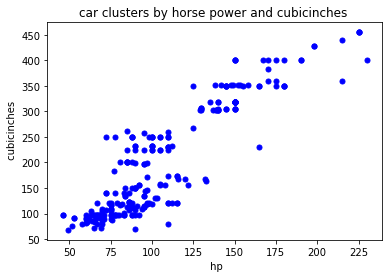

In [71]:
plt.scatter(data[' hp'],data[' cubicinches'],c='blue',s=100,marker='.')

plt.xlabel(' hp')
plt.ylabel(' cubicinches')
plt.title('car clusters by horse power and cubicinches ')
plt.show()

In [1]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

NameError: name 'X' is not defined

### Optimum number of clusters in Kmean clustering is 3

In [78]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
type(X)
print(y_kmeans)

[1 0 1 1 0 1 1 2 0 0 0 1 1 2 1 0 1 2 2 0 2 2 1 0 0 0 1 2 0 2 2 2 2 0 2 0 2
 1 2 2 1 2 2 1 0 1 2 0 2 1 2 1 1 2 0 0 1 2 2 2 0 1 2 0 0 0 1 2 0 0 2 0 0 2
 2 0 0 1 1 1 2 0 0 2 2 0 0 0 0 1 2 0 2 1 2 1 2 1 1 0 0 0 0 0 2 1 2 2 1 0 0
 2 2 2 0 1 0 0 1 2 0 0 1 0 2 0 0 0 1 1 1 1 0 1 2 2 2 0 0 0 1 2 2 0 1 1 0 0
 1 2 0 2 2 0 2 2 0 1 2 2 2 2 0 2 0 0 2 0 0 2 0 1 1 1 0 2 0 1 1 0 2 2 1 1 1
 0 0 1 1 1 0 0 0 0 0 2 2 2 0 2 1 2 2 1 0 0 2 0 0 1 2 1 2 2 1 2 1 0 1 0 2 0
 1 0 2 1 2 1 2 0 2 1 2 1 2 1 1 0 0 0 2 0 1 2 2 1 0 2 2 2]


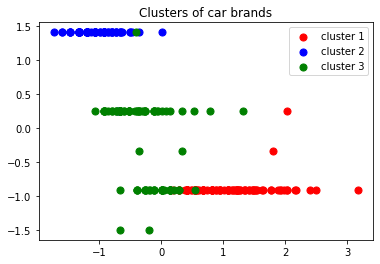

In [79]:
#X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=50,c='red',label='cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=50,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=50,c='green',label='cluster 3')

plt.title('Clusters of car brands')
plt.legend()
plt.show()


###  Visualising the clusters

Text(0, 0.5, ' cubicinches')

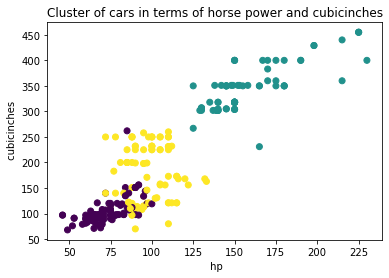

In [80]:
hp=data[' hp']
ci=data[' cubicinches']
plt.scatter(hp,ci,c=y_kmeans)
plt.title('Cluster of cars in terms of horse power and cubicinches')
plt.xlabel(' hp')
plt.ylabel(' cubicinches')

Text(0, 0.5, ' cubicinches')

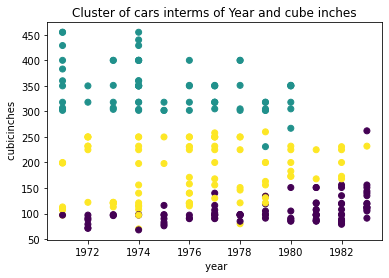

In [81]:
yr=data[' year']
ci=data[' cubicinches']
plt.scatter(yr,ci,c=y_kmeans)
plt.title('Cluster of cars interms of Year and cube inches')
plt.xlabel(' year')
plt.ylabel(' cubicinches')

Text(0, 0.5, ' year')

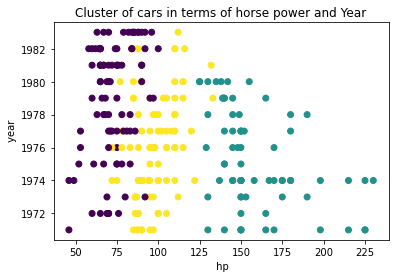

In [82]:
hp=data[' hp']
yr=data[' year']
plt.scatter(hp,yr,c=y_kmeans)
plt.title('Cluster of cars in terms of horse power and Year')
plt.xlabel(' hp')
plt.ylabel(' year')

#### Clusters of Wine in terms of PCA

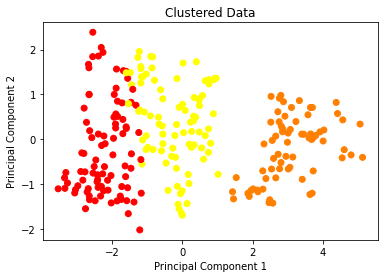

In [83]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(X)

plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=y_kmeans, cmap='autumn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data')
plt.show()

# Hierarchial Clustering

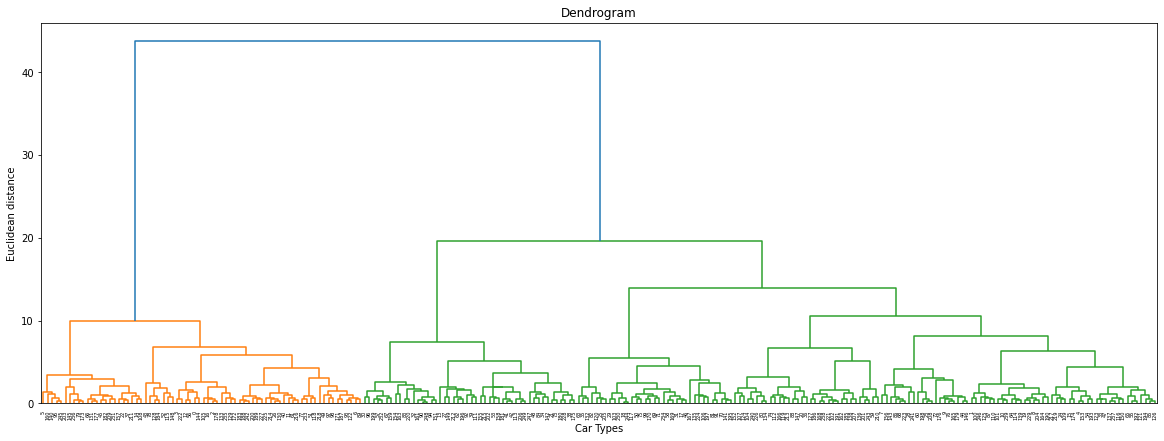

In [84]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Car Types')
plt.ylabel('Euclidean distance')
plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [88]:
y_hc

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

### optimum number of clusters is 2 for Agglomerative Clustering